In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/03 07:46:50 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [16]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.sql.functions import col

df1 = spark.read.csv('dataset2015-2023/part-00000-cf3a31a0-f371-4654-b46c-cbd995786b39-c000.csv', header=True)
df1.show()
df1.describe().show()

+-----------+--------+------+-------------------+---------------------------+
|FECHA HECHO|CANTIDAD|GENERO|       ARMAS MEDIOS|Number of domestic violence|
+-----------+--------+------+-------------------+---------------------------+
| 2015-01-01|       1|     F|         NO REPORTA|                          4|
| 2015-01-01|      10|     M|       CONTUNDENTES|                          1|
| 2015-01-01|       1|     M|     CORTOPUNZANTES|                          1|
| 2015-01-01|       3|     F|       CONTUNDENTES|                          8|
| 2015-01-01|      10|     F|SIN EMPLEO DE ARMAS|                          2|
| 2015-01-01|       5|     F|       CONTUNDENTES|                          2|
| 2015-01-01|       2|     F|SIN EMPLEO DE ARMAS|                          2|
| 2015-01-01|       2|     M|       CONTUNDENTES|                          3|
| 2015-01-01|      16|     F|       CONTUNDENTES|                          1|
| 2015-01-01|       3|     F|SIN EMPLEO DE ARMAS|               

+-------+-----------+------------------+------+--------------------+---------------------------+
|summary|FECHA HECHO|          CANTIDAD|GENERO|        ARMAS MEDIOS|Number of domestic violence|
+-------+-----------+------------------+------+--------------------+---------------------------+
|  count|      69352|             69352| 69352|               69352|                      69352|
|   mean|       null|3.4878157803668244|  null|                null|          6.729135425077864|
| stddev|       null|3.4387374643186135|  null|                null|         12.927083901243488|
|    min| 2015-01-01|                 1|     F|ARMA BLANCA / COR...|                          1|
|    max| 2023-02-28|                 9|     M| SIN EMPLEO DE ARMAS|                         99|
+-------+-----------+------------------+------+--------------------+---------------------------+



In [13]:
!pip install statsmodels
import pandas as pd
import statsmodels.api as sm
# Convert a Spark DataFrame to a pandas DataFrame
df1_pd = df1.toPandas()
X_genres = pd.get_dummies(df1_pd['GENERO'], drop_first=True, dtype=int)
X_arms = pd.get_dummies(df1_pd['ARMAS MEDIOS'], drop_first=True, dtype=int)

df_encoded = pd.concat([df1_pd, X_genres, X_arms], axis=1)

df_encoded.drop(['GENERO', 'ARMAS MEDIOS','FECHA HECHO'], axis=1, inplace=True)

y = df_encoded['Number of domestic violence']

X = df_encoded.drop('Number of domestic violence', axis=1)
X = sm.add_constant(X)  

model = sm.OLS(y, X).fit()
model.summary()



Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 49.6 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 27.9 MB/s eta 0:00:00


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Number of domestic violence   R-squared:                       0.180
Model:                                     OLS   Adj. R-squared:                  0.180
Method:                          Least Squares   F-statistic:                     1384.
Date:                         Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                                 07:05:43   Log-Likelihood:            -2.6902e+05
No. Observations:                        69352   AIC:                         5.381e+05
Df Residuals:                            69340   BIC:                         5.382e+05
Df Model:                                   11                                         
Covariance Type:                     nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   8.4960      0.136     62.691      0.000       8.230       8.762
CANTIDAD               -1.4673      0.014   -107.673      0.000      -1.494      -1.441
M                      -4.9963      0.095    -52.866      0.000      -5.182      -4.811
ARMA DE FUEGO          -4.6004      0.316    -14.565      0.000      -5.219      -3.981
CONTUNDENTES            7.4372      0.152     48.953      0.000       7.139       7.735
CORTANTES              -4.3644      0.649     -6.729      0.000      -5.636      -3.093
CORTOPUNZANTES         -4.5104      0.665     -6.783      0.000      -5.814      -3.207
ESCOPOLAMINA           -2.2462      0.274     -8.185      0.000      -2.784      -1.708
NO REPORTA             -4.2301      0.398    -10.641      0.000      -5.009      -3.451
NO REPORTADO            6.6725      0.178     37.385      0.000       6.323       7.022
PUNZANTES              -4.2862      1.750     -2.450      0.014      -7.716      -0.857
SIN EMPLEO DE ARMAS     6.2127      0.152     40.755      0.000       5.914       6.512
==============================================================================
Omnibus:                    72399.064   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7876940.013
Skew:                           5.089   Prob(JB):                         0.00
Kurtosis:                      54.208   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
unique_values_armas = df1.select('ARMAS MEDIOS').distinct().rdd.flatMap(lambda x: x).collect()
print(" 'ARMAS MEDIOS' column:", unique_values_armas)

 'ARMAS MEDIOS' column: ['ARMA DE FUEGO', 'ESCOPOLAMINA', 'SIN EMPLEO DE ARMAS', 'ARMA BLANCA / CORTOPUNZANTE', 'NO REPORTADO', 'CONTUNDENTES', 'CORTANTES', 'CORTOPUNZANTES', 'NO REPORTA', 'PUNZANTES']


In [17]:
from pyspark.sql.functions import when, col

df1 = df1.withColumn('Weapon Used',
                     when(col('ARMAS MEDIOS').isin(["ARMA BLANCA / CORTOPUNZANTE", "ARMA DE FUEGO", "CONTUNDENTES", "CORTANTES",
                                                      "CORTOPUNZANTES", "ESCOPOLAMINA", 'PUNZANTES']),
                          "Using weapons and substances with a certain degree of harm")
                     .when(col('ARMAS MEDIOS').isin(["NO REPORTA", "NO REPORTADO"]), "Unknown")
                     .when(col('ARMAS MEDIOS') == "SIN EMPLEO DE ARMAS", "No Weapon or Substance Used")
                     .otherwise("Unknown"))

df1 = df1.drop('ARMAS MEDIOS')


In [18]:
df1.show()

+-----------+--------+------+---------------------------+--------------------+
|FECHA HECHO|CANTIDAD|GENERO|Number of domestic violence|         Weapon Used|
+-----------+--------+------+---------------------------+--------------------+
| 2015-01-01|       1|     F|                          4|             Unknown|
| 2015-01-01|      10|     M|                          1|Using weapons and...|
| 2015-01-01|       1|     M|                          1|Using weapons and...|
| 2015-01-01|       3|     F|                          8|Using weapons and...|
| 2015-01-01|      10|     F|                          2|No Weapon or Subs...|
| 2015-01-01|       5|     F|                          2|Using weapons and...|
| 2015-01-01|       2|     F|                          2|No Weapon or Subs...|
| 2015-01-01|       2|     M|                          3|Using weapons and...|
| 2015-01-01|      16|     F|                          1|Using weapons and...|
| 2015-01-01|       3|     F|                       

In [19]:
unique_values_armas = df1.select('Weapon used').distinct().rdd.flatMap(lambda x: x).collect()
print(" 'weapon' column:", unique_values_armas)

 'weapon' column: ['Unknown', 'Using weapons and substances with a certain degree of harm', 'No Weapon or Substance Used']


In [22]:
from pyspark.sql import functions as F
grouped = df1.groupby(['FECHA HECHO', 'CANTIDAD', 'GENERO', 'Weapon Used'])\
            .agg(F.sum('Number of domestic violence').alias('Total domestic violence'))\
            .select(['FECHA HECHO', 'CANTIDAD', 'GENERO', 'Weapon Used', 'Total domestic violence'])

In [24]:
grouped.describe().show()

+-------+-----------+------------------+------+--------------------+-----------------------+
|summary|FECHA HECHO|          CANTIDAD|GENERO|         Weapon Used|Total domestic violence|
+-------+-----------+------------------+------+--------------------+-----------------------+
|  count|      56832|             56832| 56832|               56832|                  56832|
|   mean|       null|3.9417053772522523|  null|                null|      8.211553350225225|
| stddev|       null|3.6173151565087447|  null|                null|     15.789425843555712|
|    min| 2015-01-01|                 1|     F|No Weapon or Subs...|                    1.0|
|    max| 2023-02-28|                 9|     M|Using weapons and...|                  443.0|
+-------+-----------+------------------+------+--------------------+-----------------------+



In [25]:
grouped.write.csv('dataset3', header=True)

In [27]:
df2 = spark.read.csv('dataset1/part-00000-ae1051b2-280a-4278-87fe-1ddf8ada7d43-c000.csv', header=True)
df2.show()
df2.describe().show()

+-----------+------+---------------------+---------------------+--------------------+-----------+-----+
|    Country|Gender|Demographics Question|Demographics Response|            Question|Survey Year|Value|
+-----------+------+---------------------+---------------------+--------------------+-----------+-----+
|Afghanistan|     F|            Education|               Higher|... if she burns ...| 01/01/2015| 10.1|
|Afghanistan|     F|            Education|            Secondary|... if she burns ...| 01/01/2015| 13.7|
|Afghanistan|     F|            Education|              Primary|... if she burns ...| 01/01/2015| 13.8|
|Afghanistan|     F|       Marital status| Widowed, divorced...|... if she burns ...| 01/01/2015| 13.8|
|Afghanistan|     F|           Employment|    Employed for kind|... if she burns ...| 01/01/2015| 17.0|
|Afghanistan|     F|                  Age|                15-24|... if she burns ...| 01/01/2015| 17.3|
|Afghanistan|     F|           Employment|           Unemployed|

+-------+-----------+------+---------------------+---------------------+--------------------+-----------+------------------+
|summary|    Country|Gender|Demographics Question|Demographics Response|            Question|Survey Year|             Value|
+-------+-----------+------+---------------------+---------------------+--------------------+-----------+------------------+
|  count|      11187| 11187|                11187|                11187|               11187|      11187|             11187|
|   mean|       null|  null|                 null|                 null|                null|       null| 19.76253687315632|
| stddev|       null|  null|                 null|                 null|                null|       null|16.986436699740587|
|    min|Afghanistan|     F|                  Age|                15-24|... for at least ...| 01/01/2000|               0.0|
|    max|   Zimbabwe|     M|            Residence| Widowed, divorced...|... if she refuse...| 01/01/2018|               9.9|


<AxesSubplot:xlabel='Value', ylabel='Count'>

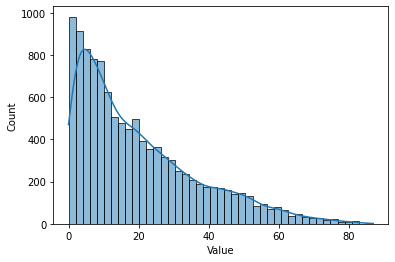

In [28]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
import seaborn as sns
from pyspark.sql.types import FloatType,IntegerType

df2 = df2.withColumn("Value", col("Value").cast(FloatType()))
df2_pd = df2.toPandas()
sns.histplot(df2_pd['Value'], kde=True)

<AxesSubplot:xlabel='Value_log', ylabel='Count'>

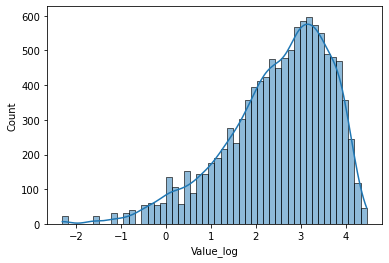

In [29]:
from pyspark.sql.functions import col, expr

#Log Transformation
df_log = df2.withColumn("Value_log", expr("log(Value)"))
df2_log = df_log.toPandas()
sns.histplot(df2_log['Value_log'], kde=True)

<AxesSubplot:xlabel='Value_sqrt', ylabel='Count'>

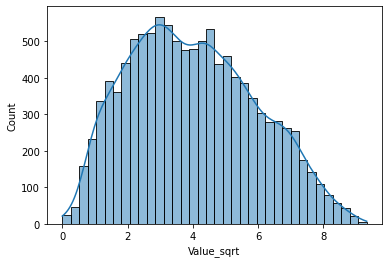

In [30]:
#Square Root Transformation
df_sqrt = df2.withColumn("Value_sqrt", expr("sqrt(Value)"))
df2_sqrt = df_sqrt.toPandas()
sns.histplot(df2_sqrt['Value_sqrt'], kde=True)

In [23]:
df2.show()

+-----------+------+---------------------+---------------------+--------------------+-----------+-----+
|    Country|Gender|Demographics Question|Demographics Response|            Question|Survey Year|Value|
+-----------+------+---------------------+---------------------+--------------------+-----------+-----+
|Afghanistan|     F|            Education|               Higher|... if she burns ...| 01/01/2015| 10.1|
|Afghanistan|     F|            Education|            Secondary|... if she burns ...| 01/01/2015| 13.7|
|Afghanistan|     F|            Education|              Primary|... if she burns ...| 01/01/2015| 13.8|
|Afghanistan|     F|       Marital status| Widowed, divorced...|... if she burns ...| 01/01/2015| 13.8|
|Afghanistan|     F|           Employment|    Employed for kind|... if she burns ...| 01/01/2015| 17.0|
|Afghanistan|     F|                  Age|                15-24|... if she burns ...| 01/01/2015| 17.3|
|Afghanistan|     F|           Employment|           Unemployed|

In [31]:
df3 = df2.withColumn("Value", expr("sqrt(Value)"))
df3.show()

+-----------+------+---------------------+---------------------+--------------------+-----------+------------------+
|    Country|Gender|Demographics Question|Demographics Response|            Question|Survey Year|             Value|
+-----------+------+---------------------+---------------------+--------------------+-----------+------------------+
|Afghanistan|     F|            Education|               Higher|... if she burns ...| 01/01/2015|3.1780497764304645|
|Afghanistan|     F|            Education|            Secondary|... if she burns ...| 01/01/2015|3.7013510788987767|
|Afghanistan|     F|            Education|              Primary|... if she burns ...| 01/01/2015|3.7148351498733914|
|Afghanistan|     F|       Marital status| Widowed, divorced...|... if she burns ...| 01/01/2015|3.7148351498733914|
|Afghanistan|     F|           Employment|    Employed for kind|... if she burns ...| 01/01/2015| 4.123105625617661|
|Afghanistan|     F|                  Age|                15-24|

<AxesSubplot:xlabel='Value', ylabel='Count'>

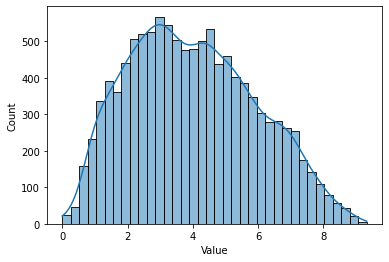

In [32]:
df3_pd = df3.toPandas()
sns.histplot(df3_pd['Value'], kde=True)

In [33]:
df3.write.csv('dataset1-1', header=True)